In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv("data/sgemm_product_v2.csv")
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [3]:
X = df.drop(columns=["Runtime"],axis=1)
y = df["Runtime"]

In [4]:
#create column transformer by applying StandardScaler() transformer (this method creates a pipeline to execute feature engineering)
numeric_features=X.select_dtypes(exclude="object").columns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, numeric_features)
    ]
)



In [5]:
X=preprocessor.fit_transform(X) #fit_transform analyzes the above code and executes it to output a scaled array
X

array([[-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
        -1.        , -1.        ],
       [-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
        -1.        ,  1.        ],
       [-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
         1.        , -1.        ],
       ...,
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
        -1.        ,  1.        ],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         1.        , -1.        ],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         1.        ,  1.        ]], shape=(241600, 14))

In [6]:
#separate dataset into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((193280, 14), (48320, 14))

In [7]:
#evaluation function to give all metrics after model training
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, mse, rmse, r2_square

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
    
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #train model

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluate train and test dataset
    model_train_mae , model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_train_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 284.0328
- Mean Absolute Error: 176.7447
- R2 Score: 0.4087
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 283.1222
- Mean Absolute Error: 176.3559
- R2 Score: 0.4024


Lasso
Model performance for Training set
- Root Mean Squared Error: 284.0662
- Mean Absolute Error: 175.7706
- R2 Score: 0.4086
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 283.1432
- Mean Absolute Error: 175.3815
- R2 Score: 0.4023


Ridge
Model performance for Training set
- Root Mean Squared Error: 284.0328
- Mean Absolute Error: 176.7442
- R2 Score: 0.4087
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 283.1222
- Mean Absolute Error: 176.3554
- R2 Score: 0.4024


KNN Regressor
Model performance for Training set
- Root Mean Squared Error: 98.9362
- Mean Absolute Error: 45.1467
- R2 Score: 0.9283
-----

In [9]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.999896
4,Decision Tree,0.999870
6,XGBoost Regressor,0.983755
7,CatBoosting Regressor,0.979881
3,KNN Regressor,0.874414
2,Ridge,0.402362
0,Linear Regression,0.402362
1,Lasso,0.402273
8,AdaBoost Regressor,0.391461


In [10]:
from xgboost import XGBRegressor 
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBRegressor()

xgb_params = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 1.0] #only uses a fraction of data per round to prevent memorization
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=5, #pick 5 combos and test
    cv=3, #test each combo 3 different times on different combos of data
    verbose=2, 
    n_jobs=-1
)

#test combos of params 
xgb_random.fit(X_train, y_train)

print(f"Best XGBoost Params: {xgb_random.best_params_}") #print the best combination of params

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}


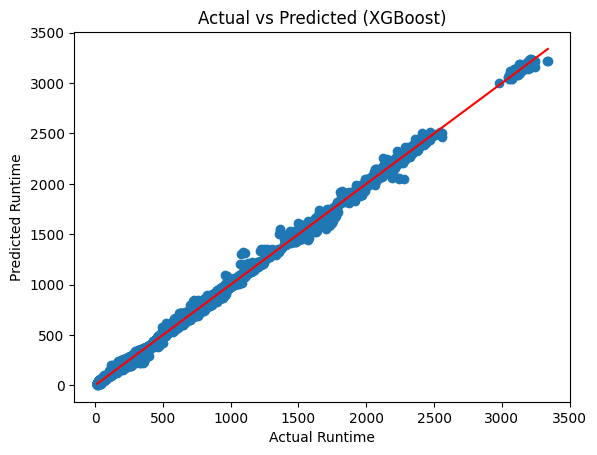

In [11]:
import matplotlib.pyplot as plt
best_xgb = xgb_random.best_estimator_ 
predictions = best_xgb.predict(X_test) #use XGBoost's best params to find the target values
plt.scatter(y_test, predictions) #Compare above predictions to the actual value for each plot (y_test gives you this)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "red") #perfect prediction line (takes max point, min point and finds slope to get a line)
plt.xlabel('Actual Runtime')
plt.ylabel('Predicted Runtime')
plt.title('Actual vs Predicted (XGBoost)')
plt.show()